In [1]:
from matplotlib.ticker import FormatStrFormatter as fsf
import matplotlib.pyplot as plt
# from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, negative_log, load_style_sheet
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_style_sheet
import numpy as np
import math as m
import vice
import sys
sys.path.append("..")
from src.utils import oh_to_12pluslog, mu, get_velocity_profile, boxcarsmoothtrend
load_style_sheet("papers")
print(sys.version_info)

/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


In [3]:
# output = vice.output("../outputs/linear/dvdr-0p1")
outputs = [
    "../outputs/constant/vgas-0",
    "../outputs/linear/dvdr-0p02",
    "../outputs/linear/dvdr-0p05",
    "../outputs/linear/dvdr-0p08"
#     "../outputs/potential_well_deepening/gamma0p2"
]
outputs = [vice.output(name) for name in outputs]

In [4]:
def mendezdelgado2022_profile():
    radii = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
#     oh = [np.log10(vice.solar_z.epsilon_to_z_conversion(9.22, 15.999) /
#                    vice.solar_z['o']) - 0.059 * r for r in radii]
    log_oh_plus12 = [9.22 - 0.059 * r for r in radii]
    return [radii, log_oh_plus12]

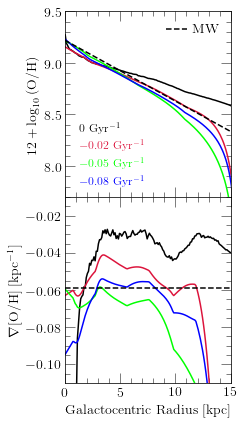

In [7]:
COLORS = ["black", "crimson", "lime", "blue"]
# LABELS = [r"$\dot L_\text{dyn} / L = %g$ Gyr$^{-1}$" % (_) for _ in [0, -0.05, -0.1, -0.15]]
LABELS = [r"$%g$ Gyr$^{-1}$" % (_) for _ in [0, -0.02, -0.05, -0.08]]

fig = plt.figure(figsize = (3.5, 6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex = ax1)
plt.setp(ax1.get_xticklabels(), visible = False)
ax2.set_xlabel(r"Galactocentric Radius [kpc]")
ax1.set_ylabel(r"$12 + \log_{10}\text{(O/H)}$")
# ax1.set_ylabel(r"[O/H]$_\text{ISM}$")
ax2.set_ylabel(r"$\nabla$[O/H] [kpc$^{-1}$]")
ax1.set_xlim([0, 15])
# ax1.set_ylim([-0.7, 0.7])
ax1.set_ylim([7.7, 9.5])
ax2.set_ylim([-0.11, -0.01])
# ax1.set_yticks([-0.5, 0, 0.5])
ax2.set_yticks([-0.1, -0.08, -0.06, -0.04, -0.02])

kwargs = {
    "c": named_colors()["black"],
    "linestyle": "--",
    "zorder": 1000,
    "label": "MW"
}
radii, logohplus12 = mendezdelgado2022_profile()
line1 = ax1.plot(radii, logohplus12, **kwargs)[0]
line2 = ax2.axhline(-0.059, **kwargs)
kwargs = {
    "loc": mpl_loc("upper right"),
    "handlelength": 1.5
}
leg = ax1.legend(**kwargs)
ax1.add_artist(leg)
line1.set_label(None)
line2.set_label(None)

def plot_prediction(output, zone_width = 0.1, **kwargs):
#     radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
    radii = [zone_width * (i + 0.5) for i in range(int(15.5 / zone_width))]
    oh = []
    dohdr = []
    for i in range(len(radii)):
        oh.append(output.zones["zone%d" % (i)].history["[o/h]"][-1])
    oh = [oh_to_12pluslog(_) for _ in oh]
    for i in range(len(radii) - 1):
        dohdr.append((oh[i + 1] - oh[i]) / (radii[i + 1] - radii[i]))
    ax1.plot(radii, oh, **kwargs)
    dohdr = boxcarsmoothtrend(radii[:-1], dohdr, window = 10)
    ax2.plot(radii[:-1], dohdr, **kwargs)

# plot_prediction(output, c = named_colors()["black"])
for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "label": LABELS[i]
    }
    plot_prediction(outputs[i], **kwargs)
    
kwargs = {
    "loc": mpl_loc("lower left"),
    "handlelength": 0,
    "fontsize": 12
}
leg = ax1.legend(**kwargs)
fancy_legend(leg, COLORS)

plt.tight_layout()
plt.subplots_adjust(hspace = 0)
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./linear/presentday-oh-profiles-gradients.%s" % (ext), **kwargs)
plt.show()